# Setup

In [3]:
counting_method = False
counting_method = True # <--

# Set to True if running on Google Colab
google_colab = True
# google_colab = True # <--

calculate_mode = False
# calculate_mode = True # <--

save_result = False
# save_result = True # <--
    
if calculate_mode == False:
    save_result = False

In [5]:
import os
import sys
import time
import csv
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

if google_colab == True:
    # Make sure to mount drive and that you have access to IDL_group_project. All paths are from the shared folder
    from google.colab import drive
    drive._mount('/content/drive')

Mounted at /content/drive


In [6]:
#This function will return both the path and the file names of all files in a directory
def path_file_list_creator(path, both_path_file = False):
  path_file_list = []
  for myfile in os.listdir(path):
    full_path = os.path.join(path,myfile)
    if both_path_file == True:
      path_file_list.append((full_path, myfile))
    else:
      path_file_list.append(full_path)
  return(path_file_list,len(path_file_list))

#Concate all different classes semantic information together from seperate directories
def concate_directories(paths):
  semantic_bundles_paths_extended = []
  total_files = 0 

  for path in paths:
    class_bundle_paths , num_files = path_file_list_creator(path)
    semantic_bundles_paths_extended.extend(class_bundle_paths)
    total_files += num_files
  print("Total Files grabbed ", total_files)
  return(semantic_bundles_paths_extended)

# Precision-Recall curve

Load visual concepts

In [7]:
if google_colab == True:
  visual_concepts = np.load('/content/drive/MyDrive/IDL_group_project/visual_concepts_positive.npy')
else:
  visual_concepts = np.load('/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/visual_concepts_positive_car.npy')
  # visual_concepts = np.load('/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/visual_concepts_positive.npy')

num_visual_concepts = visual_concepts.shape[0]
print(visual_concepts.shape)

# fig = plt.figure()
# ax = fig.add_subplot()
# ax.scatter(visual_concepts[:, 0], visual_concepts[:, 1])
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(visual_concepts[:, 10], visual_concepts[:, 11], visual_concepts[:, 12])
# plt.show()

# # Check the norm of the visual concepts
# for visual_concept in visual_concepts:
#   print(np.linalg.norm(visual_concept))

# # Normalize the visual concepts
# for i in range(len(visual_concepts)):
#   visual_concepts[i] = visual_concepts[i]/np.linalg.norm(visual_concepts[i])

(200, 512)


Load feature vectors

In [8]:
from numpy import linalg as LA

if google_colab == True:
    fp_positive_dir = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/'
    fp_negative_dir = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_negative/'
else:
    # fp_positive_dir = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/fp_positive/'
    # fp_negative_dir = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/fp_negative/'
    fp_positive_dir = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/fp_positive_car/'
    fp_negative_dir = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/fp_negative_car/'

In [9]:
# fp_positive_npy_paths = concate_directories(all_classes_fp_positive_dir)
fp_positive_npy_paths = concate_directories([fp_positive_dir])
fp_negative_npy_paths = concate_directories([fp_negative_dir])

x = np.load(fp_positive_npy_paths[0])
y = np.load(fp_negative_npy_paths[0])
print(LA.norm(x - y).item())

# Shuffle the feature vector sets the same way
import random
fp_all_npy_paths = list(zip(fp_positive_npy_paths, fp_negative_npy_paths))
random.shuffle(fp_all_npy_paths)
fp_positive_npy_paths, fp_negative_npy_paths = zip(*fp_all_npy_paths)

print(fp_positive_npy_paths[:3])
print(fp_negative_npy_paths[:3])

# Take a subset to reduce the computation time
dataset_cutoff = len(fp_positive_npy_paths)
fp_positive_npy_paths = fp_positive_npy_paths[:dataset_cutoff]
fp_negative_npy_paths = fp_negative_npy_paths[:dataset_cutoff]
print(len(fp_negative_npy_paths))

Total Files grabbed  3351
Total Files grabbed  3351
29.743072509765625
('/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/03010.npy', '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/01578.npy', '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/03011.npy')
('/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_negative/01764.npy', '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_negative/02602.npy', '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_negative/01765.npy')
3351


In [14]:
fp_positive_npy_paths[0]

'/content/drive/MyDrive/IDL_group_project/Google_Colab/data/fp_positive/03010.npy'

In [13]:
print(len(fp_positive_npy_paths[2]))
print(len(fp_negative_npy_paths[2]))

80
80


In [17]:
np.load(np.load(fp_positive_npy_paths[0]))

TypeError: ignored

Create a set of thresholds

In [ ]:
thresholds = np.linspace(0.5, 1.5, 101, endpoint=True)
num_thresholds = len(thresholds)
print(thresholds)

[0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05
 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19
 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33
 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47
 1.48 1.49 1.5 ]



Calculate the norm, compare to the thresholds

In [ ]:
if counting_method == True:
  feature_vector_cutoff = 200
else:
  feature_vector_cutoff = 200

def check_firing(fp_npy_paths, visual_concepts, thresholds, type):
  num_visual_concepts = visual_concepts.shape[0]
  num_thresholds = len(thresholds)
    
  firing_result_list = []
  firing_result_array = np.zeros(shape=(num_thresholds, num_visual_concepts), dtype=np.int32) # num_T * 200 elements

  if counting_method == True: # Count all the fires
    for i in tqdm(range(len(fp_npy_paths))):
      feature_vectors = np.load(fp_npy_paths[i])
      np.random.shuffle(feature_vectors)
      for feature_vector in feature_vectors[:feature_vector_cutoff]:
        for j in range(num_visual_concepts):
          norm = LA.norm(feature_vector - visual_concepts[j]).item()
          for k in range(num_thresholds):
            if norm < thresholds[k]:
              firing_result_array[k, j] += 1
  else: # Assign 1 for any fire
    for i in tqdm(range(len(fp_npy_paths))):
      feature_vectors = np.load(fp_npy_paths[i])
      np.random.shuffle(feature_vectors)
      for feature_vector in feature_vectors[:feature_vector_cutoff]:
        for j in range(num_visual_concepts):
          if np.any(firing_result_array[:, j] == 0):
            norm = LA.norm(feature_vector - visual_concepts[j]).item()
            for k in range(num_thresholds):
              if norm < thresholds[k]:
                firing_result_array[k, j] = 1
                
  for i in range(num_thresholds):
    firing_result_dict = {'T': thresholds[i], type: firing_result_array[i]}
    firing_result_list.append(firing_result_dict)
    
  plt.imshow(firing_result_array, interpolation='none')
  plt.xlabel('Visual concept')
  plt.ylabel('T')
  plt.show()
    
  return firing_result_list

if calculate_mode == True:
  print('Positive')
  positive_firing_result_list = check_firing(fp_positive_npy_paths, visual_concepts, thresholds, type='positive')
  print('Negative')
  negative_firing_result_list = check_firing(fp_negative_npy_paths, visual_concepts, thresholds, type='negative')

Save and load the results

In [ ]:
if counting_method == True:
    if google_colab == True:
        positive_firing_result_path = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/positive_counting.pkl'
        negative_firing_result_path = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/negative_counting.pkl'
    else:
        # positive_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/positive_counting.pkl'
        # negative_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/negative_counting.pkl'
        positive_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/positive_counting_car.pkl'
        negative_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/negative_counting_car.pkl'
else:
    if google_colab == True:
        positive_firing_result_path = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/positive_binary.pkl'
        negative_firing_result_path = '/content/drive/MyDrive/IDL_group_project/Google_Colab/data/negative_binary.pkl'
    else:
        # positive_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/positive_binary.pkl'
        # negative_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/negative_binary.pkl'
        positive_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/positive_binary_car.pkl'
        negative_firing_result_path = '/home/tunx404/Cloud/Google Drive - CMU - Shared with me/IDL_group_project/Google_Colab/data/negative_binary_car.pkl'

if save_result == True:
    pkl_file = open(positive_firing_result_path, 'wb')
    pickle.dump(positive_firing_result_list, pkl_file)
    pkl_file.close()

    pkl_file = open(negative_firing_result_path, 'wb')
    pickle.dump(negative_firing_result_list, pkl_file)
    pkl_file.close()

if calculate_mode == False:
    with open(positive_firing_result_path, 'rb') as f:
        positive_firing_result_list = pickle.load(f)
    with open(negative_firing_result_path, 'rb') as f:
        negative_firing_result_list = pickle.load(f)
    dataset_cutoff = len(fp_positive_npy_paths) # If reading saved result, set the dataset_cutoff to the same value when saving

Positive


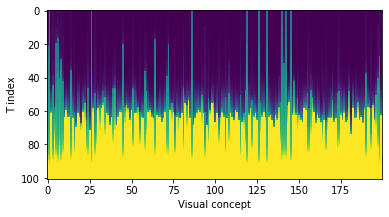

Negative


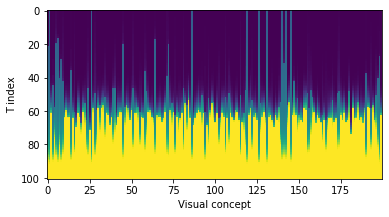

In [ ]:
def get_result_array(firing_result_list, type):
    firing_result_array = []
    for firing_result in firing_result_list:
        firing_result_array.append(np.expand_dims(firing_result[type], axis=0))
    firing_result_array = np.concatenate(firing_result_array, axis=0)

    plt.imshow(firing_result_array, interpolation='none')
    plt.xlabel('Visual concept')
    plt.ylabel('T index')
    plt.show()
    
    return firing_result_array
    
print('Positive')
positive_firing_result_array = get_result_array(positive_firing_result_list, 'positive')
print('Negative')
negative_firing_result_array = get_result_array(negative_firing_result_list, 'negative')

In [ ]:
NUM_SELECTED_VISUAL_CONCEPTS = 50
positive_firing_sum = np.sum(positive_firing_result_array, axis=0)
negative_firing_sum = np.sum(negative_firing_result_array, axis=0)
difference = positive_firing_sum - negative_firing_sum
best_indices = np.argsort(-difference, axis=0)[:NUM_SELECTED_VISUAL_CONCEPTS]
best_indices = list(best_indices)
best_indices.sort()

print(best_indices)
# print(positive_firing_sum)
# print(negative_firing_sum)
# print(difference)
# for index in best_indices:
#     print(difference[index])

[0, 1, 3, 4, 5, 6, 7, 8, 9, 14, 24, 26, 28, 34, 39, 40, 45, 51, 58, 59, 64, 71, 72, 81, 83, 86, 94, 96, 106, 108, 115, 118, 119, 122, 126, 131, 139, 140, 141, 142, 145, 155, 157, 170, 173, 174, 190, 196, 197, 198]


In [ ]:
def find_first_fire_indices(firing_result_array):
    SELECT_THRESHOLD = 1000 if counting_method == True else 0
    num_visual_concepts = firing_result_array.shape[1]
    first_fire_indices = []
    for firing_result in firing_result_array:
        for i in range(num_visual_concepts):
            if i not in first_fire_indices:
                if firing_result[i] > SELECT_THRESHOLD:
                    first_fire_indices.append(i)
                    if len(first_fire_indices) >= NUM_SELECTED_VISUAL_CONCEPTS:
                        return first_fire_indices
        if len(first_fire_indices) >= NUM_SELECTED_VISUAL_CONCEPTS:
            return first_fire_indices
        
positive_first_fire_indices = find_first_fire_indices(positive_firing_result_array)
positive_first_fire_indices.sort()
        
negative_first_fire_indices = find_first_fire_indices(negative_firing_result_array)
negative_first_fire_indices.sort()

for index in positive_first_fire_indices:
    if index in negative_first_fire_indices:
        positive_first_fire_indices.remove(index)

print(positive_first_fire_indices)
print(negative_first_fire_indices)

[1, 5, 7, 9, 16, 23, 26, 29, 51, 55, 64, 72, 81, 94, 102, 108, 118, 122, 131, 140, 142, 155, 166, 174, 193, 198]
[0, 1, 3, 5, 6, 7, 8, 9, 14, 16, 24, 26, 28, 34, 40, 45, 51, 58, 59, 64, 71, 72, 76, 81, 86, 94, 96, 102, 106, 108, 115, 118, 119, 122, 126, 131, 139, 140, 141, 142, 145, 155, 156, 173, 174, 190, 193, 196, 197, 198]


In [ ]:
# def find_most_fire_indices(firing_result_array):
#     num_visual_concepts = firing_result_array.shape[1]
#     count = np.sum(firing_result_array, axis=0)
#     indices = [i for i in range(num_visual_concepts)]
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.bar(indices, count)
#     most_fire_indices = np.argsort(-count, axis=0)[:NUM_SELECTED_VISUAL_CONCEPTS]
#     return list(most_fire_indices)
        
# positive_most_fire_indices = find_most_fire_indices(positive_firing_result_array)
# positive_most_fire_indices.sort()
        
# negative_most_fire_indices = find_most_fire_indices(negative_firing_result_array)
# negative_most_fire_indices.sort()

# for index in positive_most_fire_indices:
#     if index in negative_most_fire_indices:
#         positive_most_fire_indices.remove(index)

# print(positive_most_fire_indices)
# print(negative_most_fire_indices)

Calculate TP FP FN TN, draw the curves

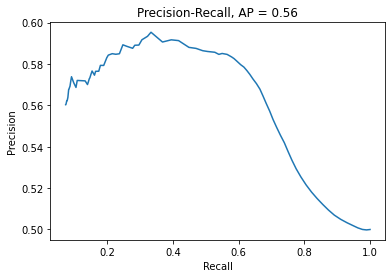

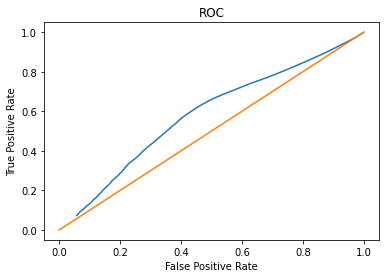

Index 	Threshold 	Precision 	Recall 		TPR 		FPR 		TP 	FP 	FN 	FN
0	0.500000	0.560312	0.073010	0.073010	0.057292	754921	592402	9585079	9747598
1	0.510000	0.560475	0.073567	0.073567	0.057692	760687	596531	9579313	9743469
2	0.520000	0.560555	0.074072	0.074072	0.058068	765903	600426	9574097	9739574
3	0.530000	0.561173	0.074896	0.074896	0.058567	774425	605585	9565575	9734415
4	0.540000	0.561831	0.075730	0.075730	0.059062	783051	610698	9556949	9729302
5	0.550000	0.562269	0.076512	0.076512	0.059565	791135	615904	9548865	9724096
6	0.560000	0.562256	0.077035	0.077035	0.059975	796540	620145	9543460	9719855
7	0.570000	0.562282	0.077631	0.077631	0.060433	802702	624877	9537298	9715123
8	0.580000	0.563009	0.078621	0.078621	0.061024	812945	630985	9527055	9709015
9	0.590000	0.563869	0.079782	0.079782	0.061708	824942	638060	9515058	9701940
10	0.600000	0.567720	0.082180	0.082180	0.062574	849737	647016	9490263	9692984
11	0.610000	0.567789	0.082929	0.082929	0.063127	857488	652734	9482512	9687266
12	0.6200

In [ ]:
num_visual_concepts_new = num_visual_concepts
# selected_indices = [i for i in range(num_visual_concepts)]
# selected_indices = positive_most_fire_indices
# selected_indices = positive_first_fire_indices
# selected_indices = [0, 1, 6, 26, 86, 119, 126, 131, 142, 145]
selected_indices = best_indices

precisions = []
recalls = []
TPRs = []
FPRs = []
TPs = []
FPs = []
FNs = []
TNs = []

num_visual_concepts_new = len(selected_indices)
for i in range(num_thresholds):
    threshold = positive_firing_result_list[i]['T']

    true_positive  = sum(positive_firing_result_list[i]['positive'][selected_indices])
    false_positive = sum(negative_firing_result_list[i]['negative'][selected_indices])

    if counting_method == True:
        false_negative = dataset_cutoff*feature_vector_cutoff*num_visual_concepts_new - true_positive  # The number of fp+ not firing
        true_negative  = dataset_cutoff*feature_vector_cutoff*num_visual_concepts_new - false_positive # The number of fp- not firing
    else:
        false_negative = num_visual_concepts_new - true_positive
        true_negative  = num_visual_concepts_new - false_positive

    precision = 1.0*true_positive/(true_positive + false_positive + 1e-6)
    if true_positive == 0:
        precision = 1
    recall = 1.0*true_positive/(true_positive + false_negative + 1e-6)
    TPR = 1.0*true_positive/(true_positive + false_negative + 1e-6)
    FPR = 1.0*false_positive/(false_positive + true_negative + 1e-6)

    precisions.append(precision)
    recalls.append(recall)
    TPRs.append(TPR)
    FPRs.append(FPR)
    TPs.append(true_positive)
    FPs.append(false_positive)
    FNs.append(false_negative)
    TNs.append(true_negative)

plt.plot(recalls, precisions)
plt.title('Precision-Recall, AP = ' + str(round(np.average(precisions[16:90]), 2)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

plt.plot(FPRs, TPRs)

x = np.linspace(0, 1, 100)
plt.plot(x, x);
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('Index \tThreshold \tPrecision \tRecall \t\tTPR \t\tFPR \t\tTP \tFP \tFN \tFN')
for i in range(num_thresholds):
    print(f'{i}\t{thresholds[i]:0.6f}\t{precisions[i]:0.6f}\t{recalls[i]:0.6f}\t{TPRs[i]:0.6f}\t{FPRs[i]:0.6f}\t{TPs[i]:d}\t{FPs[i]:d}\t{FNs[i]:d}\t{TNs[i]:d}')

[Text(0.5, 0, 'Visual concept'), Text(0, 0.5, 'T index')]

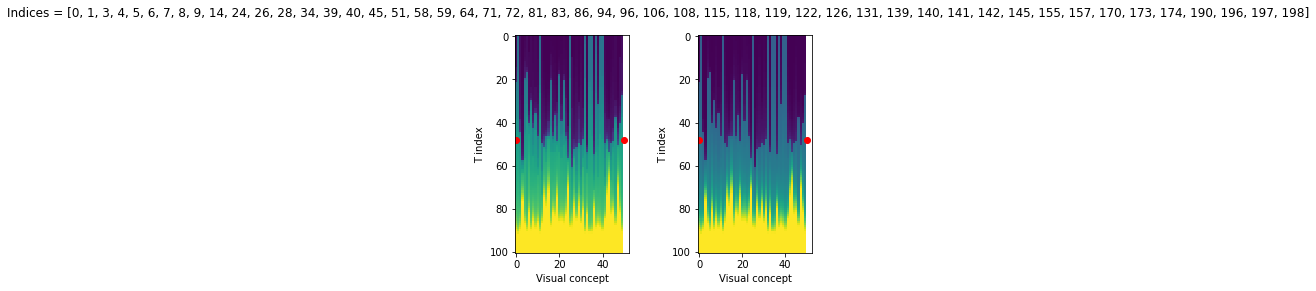

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Indices = ' + str(selected_indices))
ax1.imshow(positive_firing_result_array[:, selected_indices], interpolation='none')
ax2.imshow(negative_firing_result_array[:, selected_indices], interpolation='none')
ax1.plot(0, 48, len(selected_indices), 48, color='r', marker='o')
ax2.plot(0, 48, len(selected_indices), 48, color='r', marker='o')
ax1.set(xlabel='Visual concept', ylabel='T index')
ax2.set(xlabel='Visual concept', ylabel='T index')